<a href="https://colab.research.google.com/github/mihate2903/hot-lesbian-seg/blob/main/Exercise_4_8_Building_your_own_digit_recognition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 4.8 Building your own digit recognition model

Now, you are going to apply your knowledge to a new model and different dataset.

This is the MNIST dataset, which contains images of handwritten digits. Each image is composed of a 28 pixel by 28 pixel grid, each pixel in an image has gray-scale value. So, 0 would be as light as possible, and 255 is as dark as possible.

For each image, the 28 x 28 grid has been flattened into a 784 x 1 array, showing a digit like 0, 1, 2, 3 4, all the way up to 9. You can download the dataset from the following link:

[mnist.csv](https://drive.google.com/file/d/1Z2N5ad_hsdguG64ta76O8iTKiBnPwxZK/view?usp=sharing)

You will create a deep learning model taking in those 784 features for each image as inputs, and predicting digits from among 10 possible values for the output.

The data is pre-loaded into a pandas DataFrame called `df`. The dataframe has 2000 rows, we will divide `df` into two parts. The first 1900 rows are used to create the `predictors` for training the model. Other 100 rows are used to create the `pred_data` for making predictions with the model.

The `predictors`, `target`, and `pred_data` arrays are also pre-defined.

We also define an utility function named `showImg()` to show images from the dataset with the corresponding labels.


## Instructions

* Create a model that has two hidden layers of `50` units. The input_shape for this dataset is `(784,)`. The activation function of the hidden layers are `'relu'`.
* The output layer should use `'softmax'` activation function, and the number of nodes in this layer should be the same as the number of possible outputs, in this case: `10`.
* Compile model as you have done with previous exercise: Using `'adam'` as the optimizer, `'categorical_crossentropy'` for the loss, and `metrics=['accuracy']`.
* Fit the model using `predictors` and `target`, using a `validation_split` of `0.3`. The number of epochs is `20`, using early stopping with `patience=5`.
* After finish fitting the model, you should save the model with `model.save()` function.
* Load the saved model with `load_model()` function, then use the loaded model to predict on `pred_data`.

## Code

Load data and convert the data to NumPy array:

In [6]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical

# Load csv file into the dataframe: df
df = pd.read_csv("mnist.csv")

# The dataframe df has 2000 rows, we will divide df into two parts
# The first 1900 rows are used to create the predictors for training the model
# Other 100 rows are used to create the pred_data for making predictions with the model
# Correcting the data splitting based on the actual number of rows in df
trainDF = df.iloc[:500,:] # Use the first 500 rows for training
predictDF = df.iloc[500:,:] # Use the remaining rows for prediction
print(f"The shape of: df = {df.shape}, trainDF = {trainDF.shape}, predictDF = {predictDF.shape}")

# Create predictors NumPy array: predictors
predictors = trainDF.drop(['5'], axis=1).values

# Create list of image labels
label = trainDF['5'].values

# Convert the target to categorical: target
target = to_categorical(trainDF['5'])

# Create data for predictions NumPy array: pred_data
pred_data = predictDF.drop(['5'], axis=1).values

print(f"The shape of: predictors = {predictors.shape}, target = {target.shape}, pred_data = {pred_data.shape}")

# Define the input shape: input_shape
n_cols = predictors.shape[1]
input_shape = (n_cols,)

The shape of: df = (2000, 785), trainDF = (500, 785), predictDF = (1500, 785)
The shape of: predictors = (500, 784), target = (500, 10), pred_data = (1500, 784)


Define utility functions

<Figure size 640x480 with 0 Axes>

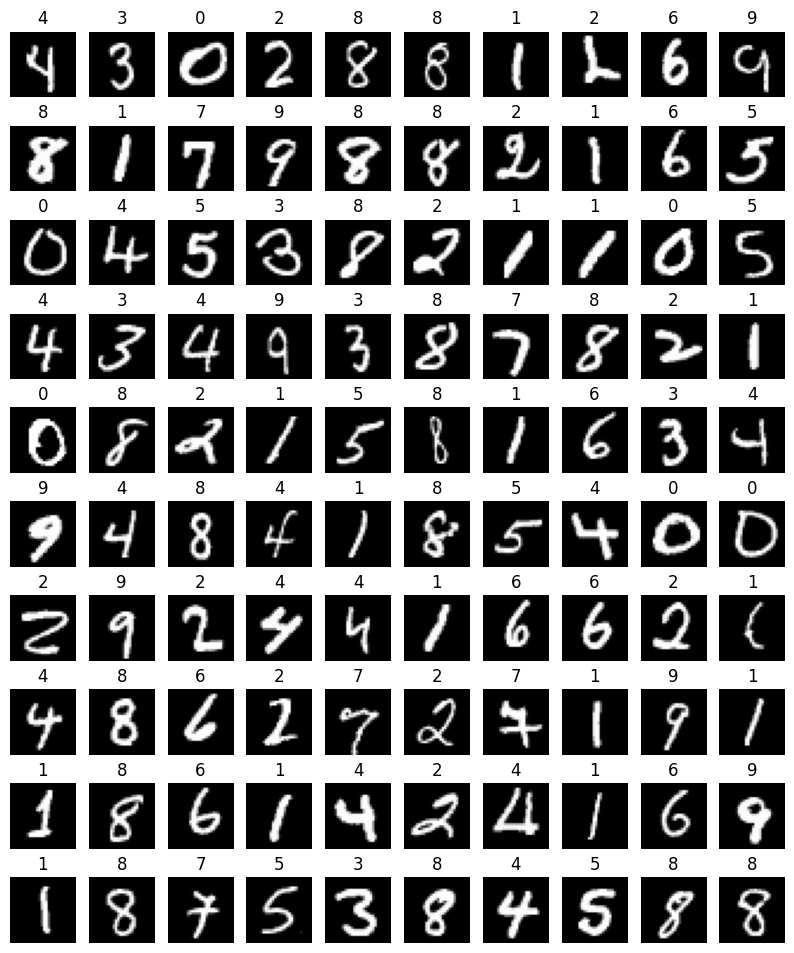

In [2]:
import matplotlib.pyplot as plt
plt.gray()

# Function showImage display images in a grid of nRow x nColumn
# Image data comes from the data array, starting from startIndex
# label array contains the corresponding lable of the image
def showImage(nRow, nColumn, startIndex, data, label):
#  imgData =[]
  # create figure
  fig = plt.figure(figsize=(nColumn, nRow*1.2))

  # reading images
  for i in range(0, nRow*nColumn):
    row = data[startIndex + i]
    title = label[startIndex + i]
    imgData = row.reshape([28,28])

    # Adds a subplot at the i+1 position
    fig.add_subplot(nRow, nColumn, i+1)
    plt.imshow(imgData)
    plt.axis('off')
    plt.title(title)

  plt.show()

# Show 100 images in the predictors array, starting from #0
showImage(10, 10, 0, predictors, label)


Create a neural network for the classification task

In [3]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Define a function to create model:
def get_new_model(input_shape):
    model = Sequential()
    # Tăng số neuron từ 50 lên 128 cho lớp ẩn đầu tiên
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    # Tăng số neuron từ 50 lên 128 cho lớp ẩn thứ hai
    model.add(Dense(128, activation='relu'))
    # Giữ nguyên lớp đầu ra
    model.add(Dense(10, activation='softmax'))
    return model


Compile and fit the model with a validation dataset:

In [4]:
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

# Specify, compile and fit the model
model = get_new_model(input_shape)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=5)
model_training = model.fit(predictors, target, epochs=20, validation_split=0.3, callbacks=[early_stopping_monitor])

# Save the model - creates a zip archive myModel.keras.
model.save('myModel.keras')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.2153 - loss: 61.8175 - val_accuracy: 0.5988 - val_loss: nan
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7118 - loss: 8.1825 - val_accuracy: 0.6628 - val_loss: nan
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8846 - loss: 1.7997 - val_accuracy: 0.7093 - val_loss: nan
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9625 - loss: 0.4105 - val_accuracy: 0.7558 - val_loss: nan
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9871 - loss: 0.0527 - val_accuracy: 0.7326 - val_loss: nan
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9711 - loss: 0.2394 - val_accuracy: 0.7558 - val_loss: nan


Load the saved model and make predictions on the `pred_data`

In [7]:
# Import load_model
from tensorflow.keras.models import load_model

myModel = load_model('myModel.keras')
predictions = myModel.predict(pred_data)
prediction_classes = np.argmax(predictions,axis=1)
print(prediction_classes)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[2 8 3 ... 8 9 9]


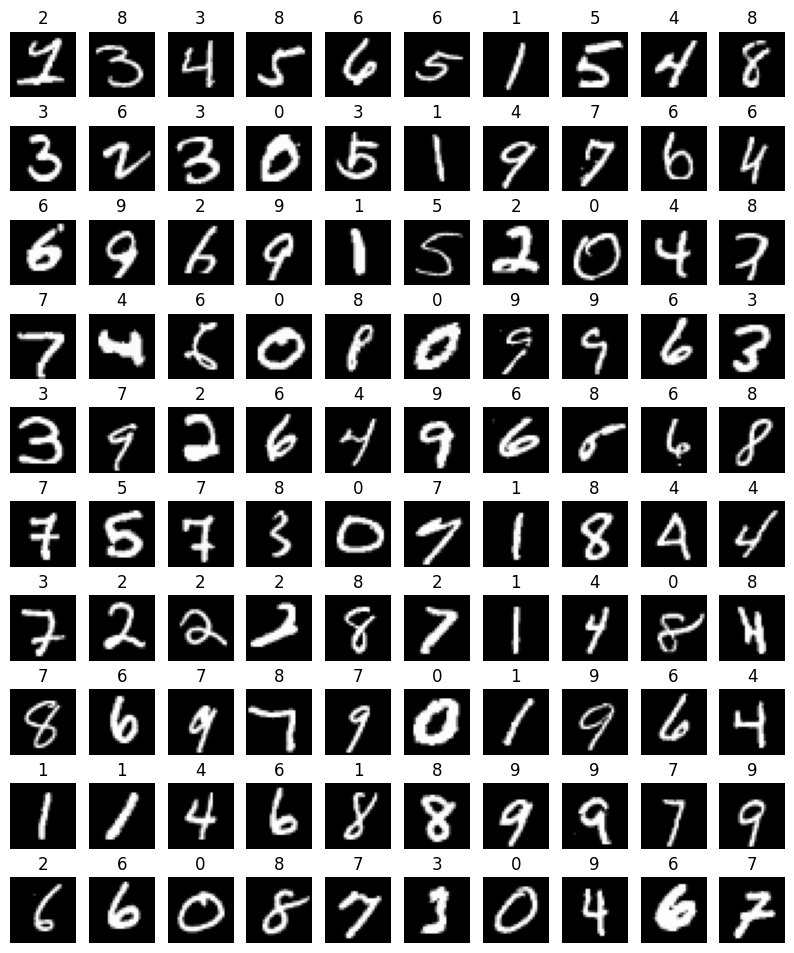

In [8]:
# Show 100 images in the pred_data array with prediction result, starting from #0
showImage(10, 10, 0, pred_data, prediction_classes)

# Question
The current model has the `val_accuracy` around `0.77`. Please improve the model to get the `val_accuracy` more than `0.8`.
Use the new model to predict on the `pred_data` and compare the results.